In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import train data
df=pd.read_csv("C://Users//yadav//Downloads//Jupyter//Datasets//titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#checking duplicates
df.duplicated().sum()

0

In [6]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
#checking null values
df.duplicated().sum()

114

In [10]:
#Using sum() on a binary column (0/1) gives the count of positive outcomes.
df.groupby('Sex')['Survived'].sum()
#=891-233-109=549 did not survived

Sex
female    233
male      109
Name: Survived, dtype: int64

In [11]:
df[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [12]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())

In [13]:
#feature transformation

In [14]:
df1=pd.get_dummies(data=df, columns=['Sex'], drop_first=True, dtype=int)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_median,Sex_male
0,0,3,22.0,1,0,7.2500,22.0,1
1,1,1,38.0,1,0,71.2833,38.0,0
2,1,3,26.0,0,0,7.9250,26.0,0
3,1,1,35.0,1,0,53.1000,35.0,0
4,0,3,35.0,0,0,8.0500,35.0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,27.0,1
887,1,1,19.0,0,0,30.0000,19.0,0
888,0,3,NaN,1,2,23.4500,28.0,0
889,1,1,26.0,0,0,30.0000,26.0,1


In [15]:
df1.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.389108
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Age_median    0.510245
Sex_male     -0.618921
dtype: float64

# Histogram and Distribution plot

<Axes: >

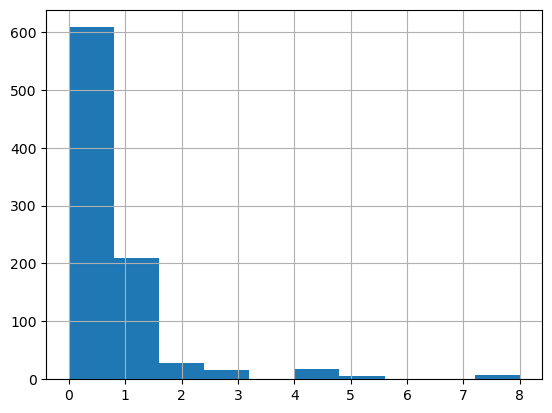

In [16]:
df1['SibSp'].hist()

<Axes: >

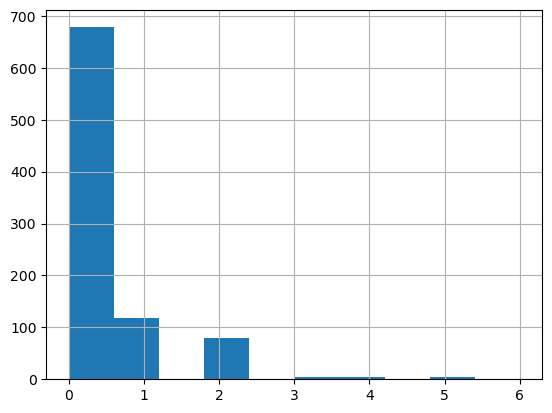

In [17]:
df1['Parch'].hist()

<Axes: >

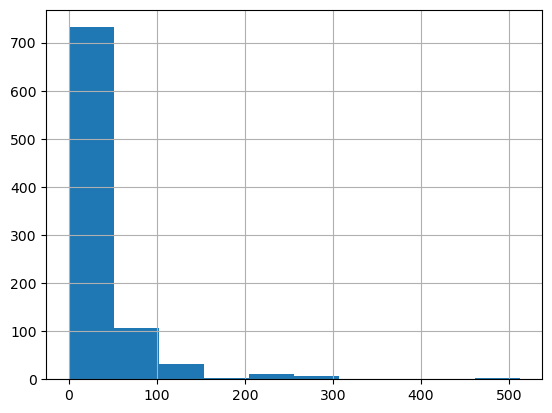

In [18]:
df1['Fare'].hist()

In [19]:
df1.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.389108
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Age_median    0.510245
Sex_male     -0.618921
dtype: float64

In [20]:
#using log first then box cox
#df1['log_SibSp']=np.log1p(df1['SibSp'])
#df1['log_SibSp']
# from scipy.stats import boxcox
# df1['boxcox_Fare'], param = boxcox(df1['Fare']+1)
# print(df1['boxcox_Fare'])
# print(f'param value is {param}')

# df1['boxcox_SibSp'], param = boxcox(df1['SibSp']+1)
# print(df1['boxcox_SibSp'])
# print(f'param value is {param}')

# df1['boxcox_Parch'], param = boxcox(df1['Parch']+1)
# print(df1['boxcox_Parch'])
# print(f'param value is {param}')

# ML steps

In [21]:
X=df1.drop(columns=['Age','Survived'])
y=df1['Survived']


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


# Hyperparameter tuning

In [24]:
#model
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=0)

#parameters which you want to tune 
param_grid={'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5,6]}

# GridSearchCV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [25]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [26]:
grid.best_estimator_.feature_importances_

array([0.25754868, 0.05513595, 0.        , 0.0608736 , 0.08110601,
       0.54533576])

In [27]:
s1=pd.DataFrame(grid.best_estimator_.feature_importances_, columns=['feature'], index=X_train.columns.tolist())
s1

,feature
Pclass,0.257549
SibSp,0.055136
Parch,0.000000
Fare,0.060874
Age_median,0.081106
Sex_male,0.545336


In [28]:
# filter out important features
important_features = s1[s1['feature']>0].index.tolist()
important_features

['Pclass', 'SibSp', 'Fare', 'Age_median', 'Sex_male']

# Random Forest


# Best Model after hyperparameter tuning, pruning, and unnecessary variable removal

In [29]:
X_imp=X[important_features]
y=df1['Survived']

from sklearn.model_selection import train_test_split
X_imp_train, X_imp_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

from sklearn.tree import DecisionTreeClassifier
dt_best_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state=0) 
dt_best_model.fit(X_imp_train, y_train)

# train accuracy
ypred_train=dt_best_model.predict(X_imp_train)
from sklearn.metrics import accuracy_score
print('Train accuracy : ', accuracy_score(y_train, ypred_train))

# cross validation score
from sklearn.model_selection import cross_val_score
print('cross validation score : ', cross_val_score(dt_best_model, X_imp_train, y_train, cv=5).mean())

# test predict
ypred_test=dt_best_model.predict(X_imp_test)
from sklearn.metrics import accuracy_score
print('Test accuracy : ', accuracy_score(y_test, ypred_test))

Train accuracy :  0.8469101123595506
cross validation score :  0.7976952624839949
Test accuracy :  0.8547486033519553


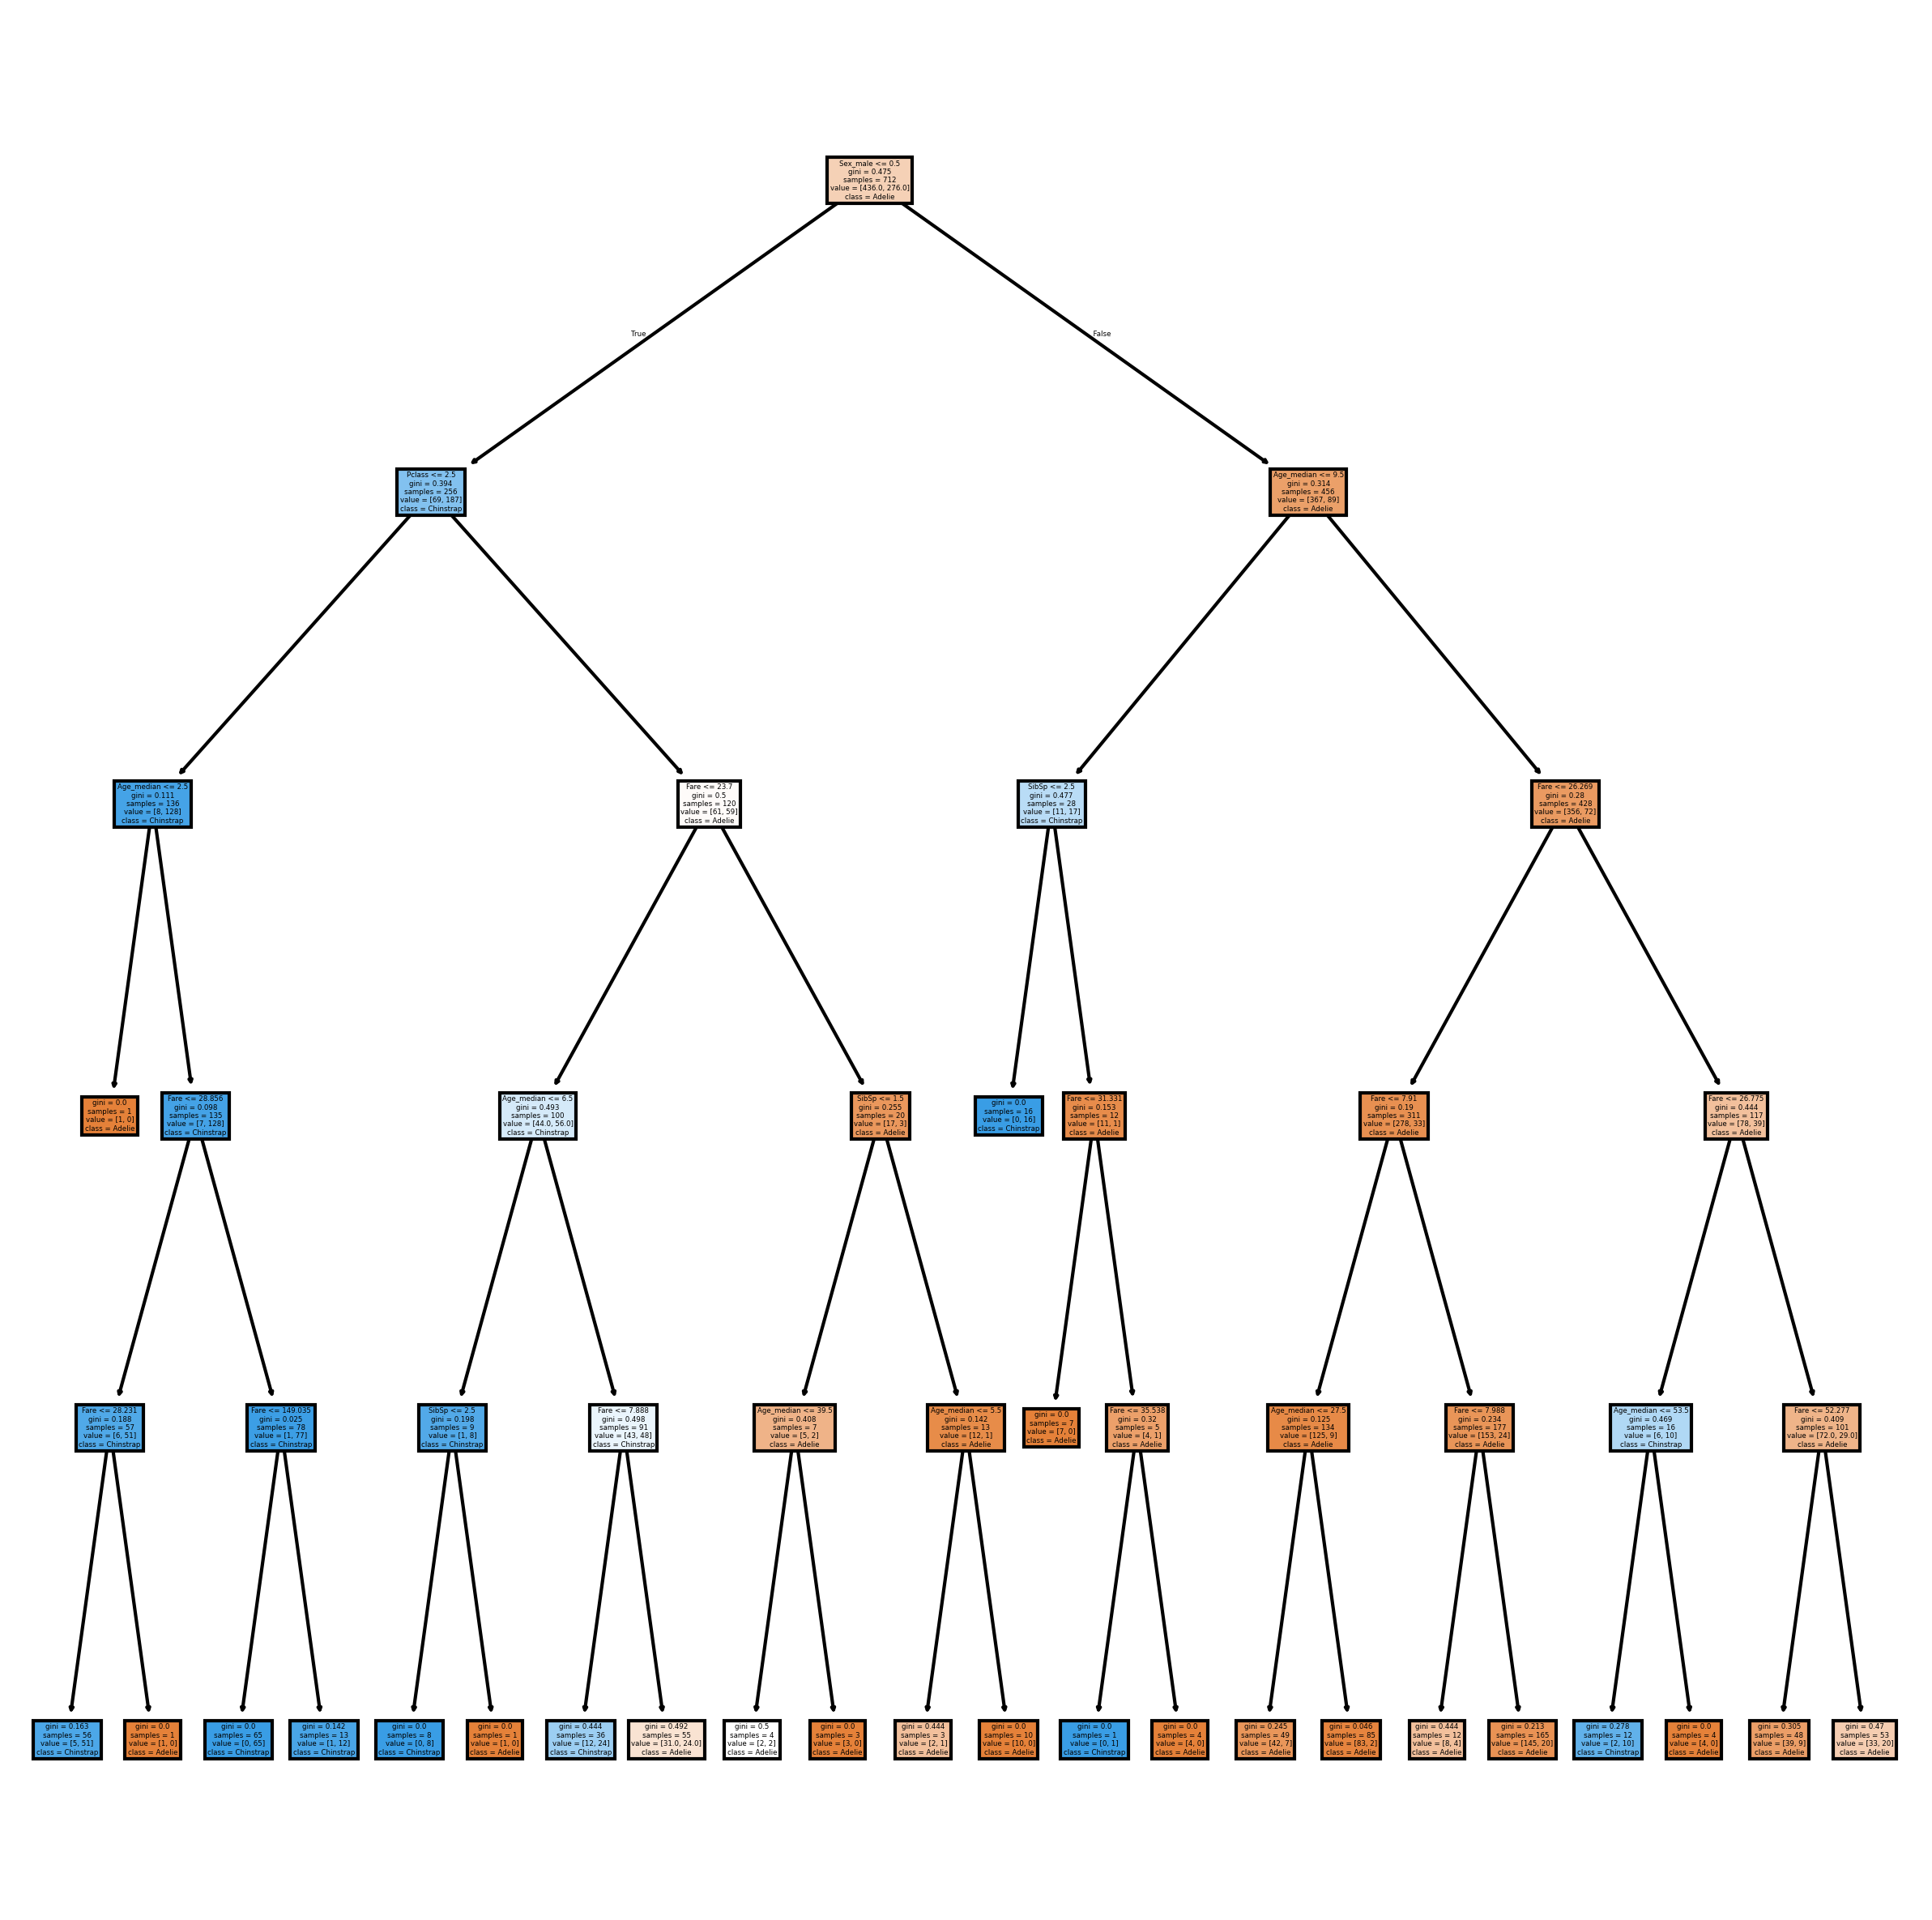

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10), dpi=300)

plot_tree(dt_best_model, filled=True, 
          feature_names=['Pclass', 'SibSp', 'Fare', 'Age_median', 'Sex_male'],
         class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()